# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [13]:
import string
from collections import Counter
import matplotlib.pyplot as plt

with open("english.10MB", "r", encoding="iso-8859-1") as file:
    data = file.read()

### Zadanie 2
Zamień wszystkie litery na małe.


In [14]:
data = data.lower()

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


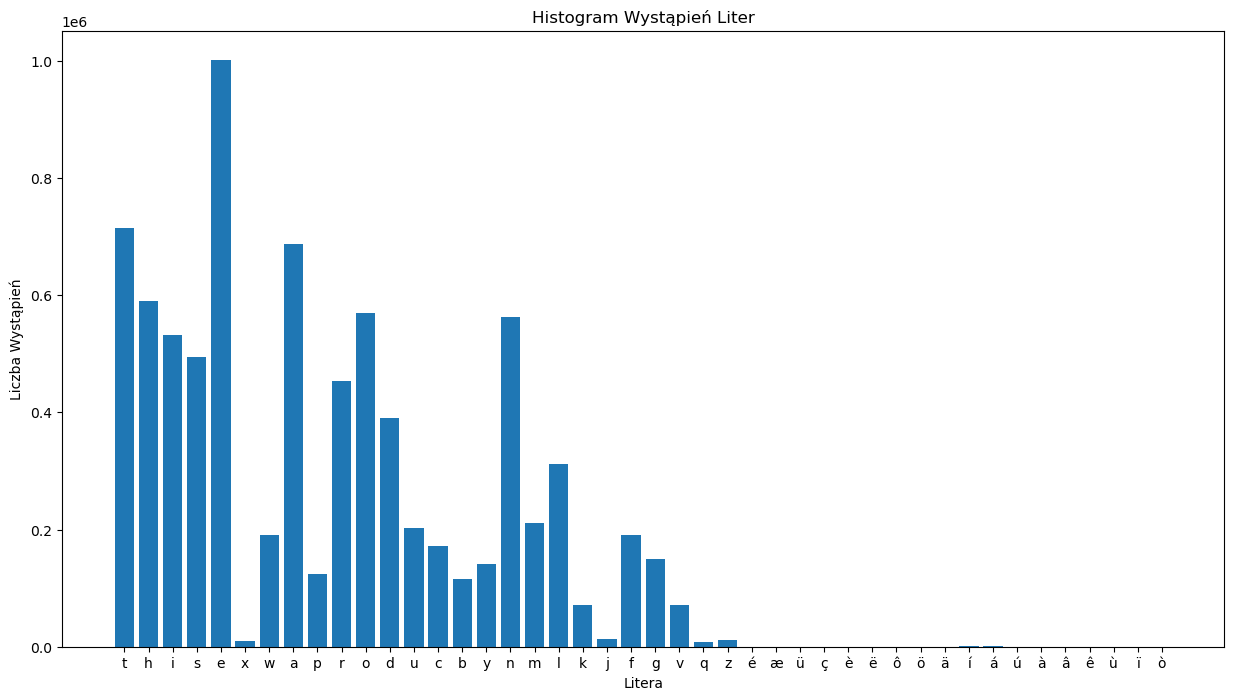

Most common letter: e, quanity: 1001102


In [15]:
cleaned_text = ''.join(c for c in data if c.isalpha())
letter_counts = Counter(cleaned_text)

plt.figure(figsize=(15,8))
plt.bar(letter_counts.keys(), letter_counts.values())
plt.xlabel('Litera')
plt.ylabel('Liczba Wystąpień')
plt.title('Histogram Wystąpień Liter')
plt.show()
most_common_letter, quanity = letter_counts.most_common(1)[0]
print(f'Most common letter: {most_common_letter}, quanity: {quanity}')

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [16]:
def nast(prefix, data):
    counter = Counter()
    for i in range(len(data)):
        if data[i:i+len(prefix)] == prefix and data[i+len(prefix)] != ' ':
            next_char = data[i+len(prefix)]
            counter[next_char] += 1

    top_characters = counter.most_common(5)
    return [char for char, _ in top_characters]

In [17]:
print(nast('th', data))

['e', 'a', 'i', 'o', 'y']


### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [18]:
def find_next_characters(char, data):
    counter = Counter()
    print(char)
    for i in range(len(data)):
        if data[i:i+len(char)] == char and data[i + len(char)].isalpha():
            next_char = data[i+len(char)]
            counter[next_char] += 1
    print(counter)
    top_characters = counter.most_common(5)
    return [char for char, _ in top_characters]

In [26]:
character = input('Podaj litere: ')

for i in range(6):
    suggested_characters = find_next_characters(character, data)
    if suggested_characters:
        user_input = input(f'Podaj kolejna litere (mozliwe: {suggested_characters}): ')
        character += user_input
    else:
        print("Brak dostępnych liter.")
        break
print('Pelne slowo: ', character)


f
Counter({'o': 32074, 'a': 15052, 'r': 13264, 'e': 13048, 'i': 12437, 'n': 8032, 't': 7241, 'u': 5916, 'f': 5807, 'l': 4192, 'y': 381, 's': 363, 'á': 29, 'í': 19, 'w': 17, 'b': 16, 'g': 10, 'ú': 10, 'é': 5, 'm': 4, 'd': 3, 'h': 1, 'ê': 1})
fo
Counter({'r': 24507, 'u': 3464, 'l': 2125, 'o': 1072, 'x': 265, 'e': 253, 'n': 137, 'w': 119, 'i': 34, 'a': 32, 's': 25, 'g': 19, 'd': 8, 'c': 4, 'y': 2, 'm': 1})
for
Counter({'e': 3805, 't': 2554, 'm': 1221, 'g': 468, 'c': 461, 'w': 354, 'b': 336, 's': 105, 'd': 70, 'n': 55, 'f': 40, 'a': 34, 'l': 28, 'k': 25, 'r': 9, 'i': 1, 'o': 1})
fore
Counter({'s': 294, 'h': 110, 'i': 106, 'g': 97, 'v': 53, 't': 35, 'w': 32, 'f': 31, 'n': 18, 'm': 16, 'a': 14, 'c': 12, 'b': 7, 'o': 7, 'r': 5, 'p': 2, 'l': 1, 'k': 1})
fores
Counter({'t': 183, 'a': 64, 'e': 21, 'i': 13, 'k': 6, 'w': 3, 'p': 2, 'h': 2})
forest
Counter({'s': 27, 'a': 6})
Pelne slowo:  forests


In [24]:
def suggest_next_words(sentence, data, length):
    counter_words = Counter()
    data_2 = data.split()
    print('Current sentence: ', sentence)
    for i, word in enumerate(data_2):
        if length > 1: sen = ' '.join(data_2[i:length+i])
        else: sen = word
        # print(sen)
        if sen.startswith(sentence):
            next_word = data_2[i + length]
            counter_words[next_word] += 1

    top_words = counter_words.most_common(5)
    return [char for char, _ in top_words]

### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [25]:
sentence = input('Podaj litere: ')

length = 1
for i in range(6):
    suggested_words = suggest_next_words(sentence, data, length)
    if suggested_words:
        length += 1
        user_input = input(f'Podaj kolejne slowo (mozliwe: {suggested_words}): ')
        sentence = ' '.join([sentence, user_input])
    else:
        print("Brak dostępnych slow.")
        break
print('Pelne zdanie: ', sentence)

Current sentence:  forest
Current sentence:  forest and
Current sentence:  forest and began
Current sentence:  forest and began to
Current sentence:  forest and began to cut
Current sentence:  forest and began to cut and
Full sentence:  forest and began to cut and chop
